In [35]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set() # Setting seaborn as default style even if use only matplotlib

In [206]:
def dict_of_datasets():
    """
    Returns a dictionary of the datasets
    where key is pillar name and value is the [pillar]_train.csv
    """
    d = {}
    directory = 'Datasets/'
    for filename in sorted(os.listdir(directory)):
        if filename.endswith("_train.csv"):
            name = filename.split("_")[0]
            d["{0}".format(name)] = pd.read_csv(os.path.join(directory, filename), index_col=0)
            
    return d

def generate_prosperity():
    prosperity_data = pd.DataFrame()
    fpath = 'Datasets/'
    for file in sorted(os.listdir(fpath)):

        #if file.startswith('.') or 'test' in file: continue
        if 'test' in file: continue
        #print(fpath+file)
        data = pd.read_csv(fpath+file)
        pillar = file.split('/')[-1][:4]
        if len(prosperity_data) == 0:
            prosperity_data = data[['country', 'isonum', 'isocode', 'year', pillar]]
            continue
        prosperity_data = prosperity_data.merge(data[['country', 'year', pillar]], on=['country', 'year'], how='left')
    return prosperity_data

def get_prosperity_scores():
    """
    Calculate prosperity score of each country for each year.
    Returns dataframe w/ pillar score & overall prosperity score
    
    ---
    
    Example run: prosperity_data = get_prosperity_scores()
    
    """
    pillars = ['busi', 'econ', 'educ', 'envi','gove', 'heal', 'pers', 'safe', 'soci']  
    prosperity_data = generate_prosperity()
    prosperity_data["prosperity"] = prosperity_data[pillars].mean(axis=1)
    return prosperity_data

def most_growth_5(most=True):
    """
    Gets you the top 5 countries with most growth. 
    
    ---
    
    Example run: top5 = most_growth_5()
    
    ---
    
    ** May need to change end to 2016 (add on to 
    generate_prosperity in that case)
    """
    start = 2007
    end = 2014
    
    # prosperity data with prosperity scores
    prosperity_data = get_prosperity_scores()
    pillars = ['busi', 'econ', 'educ', 'envi','gove', 'heal', 'pers', 'safe', 'soci']  

    # average out all the pillars to get 
    # prosperity score for a country in a certain year
    prosperity_data["prosperity"] = prosperity_data[pillars].mean(axis=1)

    # filter for "end year" and "start year" should it be 2014 or 2016?
    prosperity_data_07= prosperity_data[prosperity_data["year"] == start]
    prosperity_data_14= prosperity_data[prosperity_data["year"] == end]

    # calculate the first part of CAGR, Vfinal/Vbegin ** double check
    prosperity_data_14["temp"] = prosperity_data_14.prosperity.values / prosperity_data_07.prosperity.values


    def CAGR(row):
        c = 1/((end - start)+1)
        if row > 0:
            return (row ** c) - 1
        else:
            temp = abs(row) ** c
            return -1 * temp - 1

    # calculate the second part of CAGR
    prosperity_data_14["CAGR"] = prosperity_data_14["temp"].apply(lambda x: CAGR(x))
    if most:
        return prosperity_data_14.sort_values(by="CAGR", ascending = False)[:5].country.tolist()
    else:
        return prosperity_data_14.sort_values(by="CAGR", ascending = True)[:5].country.tolist()

# Data for line graph of average prosperity

[56.9801566019421,
 57.057490063638156,
 57.2709388484002,
 57.734465292547306,
 57.94974977520311,
 58.02752553625484,
 58.27153523905255,
 58.28073075029229]

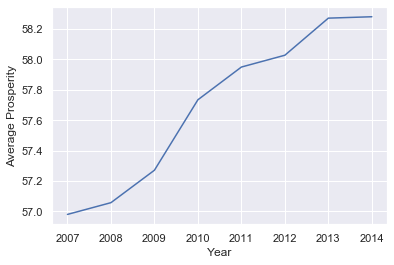

In [287]:
prosperity_data = get_prosperity_scores()

y = prosperity_data.groupby("year")["prosperity"].mean()
d = {"Year": y.index.tolist(), "Average Prosperity": y.values.tolist()}
df = pd.DataFrame(data=d)

sns.lineplot(data=df, x='Year', y='Average Prosperity')

df["Average Prosperity"].values.tolist()

busi
[47.92838970926784, 48.51531481902872, 49.25169350796898, 50.13334695444811, 50.95235329186356, 52.41147111726287, 53.32989147365493, 52.60430590738386]
econ
[61.41184493199291, 61.537451494460136, 61.5066271020262, 61.66737306838068, 61.72723908392375, 61.548767653087644, 61.498656842532576, 61.76711242470965]
educ
[53.09667181488651, 53.316868494021016, 53.41222380951747, 54.33770947808387, 54.4990125310501, 54.52653100826596, 54.50362437203427, 54.52256980998404]
envi
[58.33321050349498, 58.760940628563795, 59.03438859977978, 60.34599224833034, 60.610673405180044, 60.62184207071394, 60.93976505970795, 61.33548145166179]
gove
[49.45172971687061, 49.716395269304314, 49.76290601691944, 49.75355634753336, 49.87716422625036, 49.754352006336184, 49.58116338077008, 49.77562224624941]
heal
[68.55346185568995, 68.85712205003571, 69.1924981238858, 69.42307312216535, 69.73136487103149, 69.88804951610182, 69.79720001732743, 69.61244352711927]
pers
[58.11590163979754, 57.21723185289626, 57.

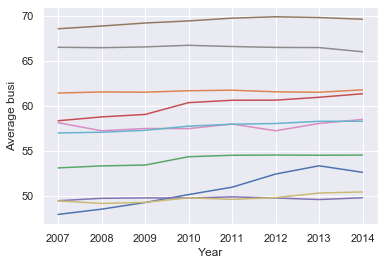

In [294]:
prosperity_data = get_prosperity_scores()

for pillar in pillars:

    y = prosperity_data.groupby("year")[pillar].mean() 
    d = {"Year": y.index.tolist(), "Average {0}".format(pillar): y.values.tolist()}
    df = pd.DataFrame(data=d)
    print(pillar)
    print(df["Average {0}".format(pillar)].values.tolist())
    sns.lineplot(data=df, x='Year', y="Average {0}".format(pillar))



In [ ]:
y = prosperity_data.groupby("year")["prosperity"].mean()
d = {"Year": y.index.tolist(), "Average Prosperity": y.values.tolist()}
df = pd.DataFrame(data=d)

sns.lineplot(data=df, x='Year', y='Average Prosperity')

df["Average Prosperity"].values.tolist()

# DATA for line graphs for top & bottom 5 countries 

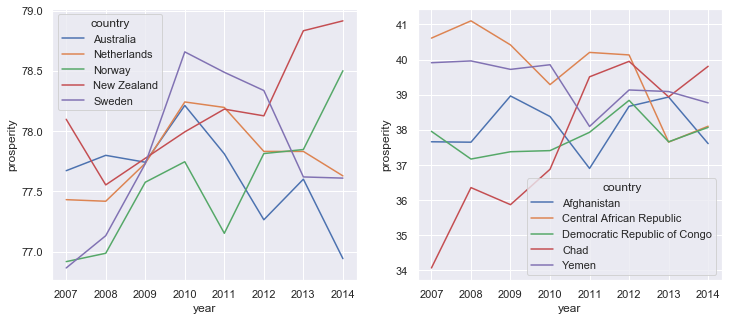

In [207]:
avg_prosperity = prosperity_data.groupby('country').agg({'prosperity':'mean'})

low_prosp_countries = list(avg_prosperity.sort_values(by='prosperity').head().index)
high_prosp_countries = list(avg_prosperity.sort_values(by='prosperity', ascending=False).head().index)

low_prosp = prosperity_data.loc[prosperity_data['country'].isin(low_prosp_countries)]
high_prosp = prosperity_data.loc[prosperity_data['country'].isin(high_prosp_countries)]

fig, axs = plt.subplots(ncols=2, figsize=(12,5))
sns.lineplot(data=high_prosp, x='year', y='prosperity', hue='country', ax=axs[0])
sns.lineplot(data=low_prosp, x='year', y='prosperity', hue='country', ax=axs[1])

In [224]:

avg_prosperity = prosperity_data.groupby('country').agg({'prosperity':'mean'})

low_prosp_countries = list(avg_prosperity.sort_values(by='prosperity').head().index)
high_prosp_countries = list(avg_prosperity.sort_values(by='prosperity', ascending=False).head().index)

low_prosp = prosperity_data.loc[prosperity_data['country'].isin(low_prosp_countries)]
high_prosp = prosperity_data.loc[prosperity_data['country'].isin(high_prosp_countries)]


c = low_prosp.country.unique()
for c0 in c:
    print(c0)
    print(low_prosp[low_prosp["country"] == c0]["prosperity"].values.tolist())
    print("----")
print("---------")
c = high_prosp.country.unique()
for c0 in c:
    print(c0)
    print(high_prosp[high_prosp["country"] == c0]["prosperity"].values.tolist())
    print("----")

Afghanistan
[37.65897538926866, 37.64705848693848, 38.963036643134224, 38.37829611036513, 36.900201161702476, 38.66849920484755, 38.93273417154948, 37.60717476738824]
----
Central African Republic
[40.610100428263344, 41.10119289822049, 40.41649023691813, 39.286528481377495, 40.2028488583035, 40.1312510172526, 37.64913643731011, 38.101737552218964]
----
Democratic Republic of Congo
[37.9554386138916, 37.16770553588867, 37.37549654642741, 37.407493591308594, 37.9289616478814, 38.83824708726671, 37.65847290886773, 38.06906594170464]
----
Chad
[34.067547692192925, 36.354613622029625, 35.8691283331977, 36.87599203321669, 39.508369869656036, 39.94830407036675, 38.937186770968964, 39.80755297342936]
----
Yemen
[39.909220377604164, 39.96099726359049, 39.7200027041965, 39.852127922905815, 38.095397525363495, 39.13356738620334, 39.089093102349175, 38.76679356892904]
----
---------
Australia
[77.67186906602647, 77.79921298556857, 77.74207560221355, 78.21320343017578, 77.81163957383897, 77.264862

# Data for Column Chart with Negative Values

In [318]:
top_5_growth = most_growth_5()
# chad = prosperity_data[prosperity_data["country"] == "Chad"]
# togo = prosperity_data[prosperity_data["country"] == "Togo"]
# zimb = prosperity_data[prosperity_data["country"] == "Zimbabwe"]
# ic = prosperity_data[prosperity_data["country"] == "Ivory Coast"]
# georgia = prosperity_data[prosperity_data["country"] == "Georgia"]

# fig, axs = plt.subplots(ncols=2, nrows=4)
# sns.lineplot(x='year', y='prosperity', data=chad, ax=axs[0][0])
# sns.lineplot(x='year', y='prosperity', data=togo, ax=axs[1][0])
# sns.lineplot(x='year', y='prosperity', data=zimb, ax=axs[0][1])
# sns.lineplot(x='year', y='prosperity', data=ic, ax=axs[1][1])

# bottom_5_growth = most_growth_5(False)
# chad = prosperity_data[prosperity_data["country"] == bottom_5_growth[0]]
# togo = prosperity_data[prosperity_data["country"] == bottom_5_growth[1]]
# zimb = prosperity_data[prosperity_data["country"] == bottom_5_growth[2]]
# ic = prosperity_data[prosperity_data["country"] ==  bottom_5_growth[3]]
# georgia = prosperity_data[prosperity_data["country"] == bottom_5_growth[4]]

# #fig, axs = plt.subplots(ncols=2, nrows=2)
# sns.lineplot(x='year', y='prosperity', data=chad, ax=axs[2][0])
# sns.lineplot(x='year', y='prosperity', data=togo, ax=axs[3][0])
# sns.lineplot(x='year', y='prosperity', data=zimb, ax=axs[2][1])
# sns.lineplot(x='year', y='prosperity', data=ic, ax=axs[3][1])

#### DATA for BAR CHARTS
def top_bottom_growers(top = True):
    """
    Returns the changes in pillars for top 5 growing countries if top = True
    or for bottom 5 growing (regressing) countries if top = False
    
    """
    
    def pillar_growth_rates(prosperity_data):
        """
        Returns the change in each pillar over time 

        ---

        Example run: pillar_growth_rates(df)
        """
        start = 2007
        end = 2014

        prosperity_data = prosperity_data[['country','year', 'busi', 'econ', 'educ', 'envi', 'gove', 'heal', 'pers', 'safe', 'soci']]
        pillars = ['busi', 'econ', 'educ', 'envi','gove', 'heal', 'pers', 'safe', 'soci']  

        # filter for "end year" and "start year"
        prosperity_data_07= prosperity_data[prosperity_data["year"] == start]
        prosperity_data_14= prosperity_data[prosperity_data["year"] == end]

        for pillar in pillars:    
            # calculate the first part of CAGR, Vfinal/Vbegin 
            prosperity_data_14["temp"] = prosperity_data_14[pillar].values / prosperity_data_07[pillar].values


            def CAGR(row):
                c = 1/((end - start)+1)
                if row > 0:
                    return (row ** c) - 1
                else:
                    temp = abs(row) ** c
                    return -1 * temp - 1

            # calculate the second part of CAGR
            prosperity_data_14["CAGR_{0}".format(pillar)] = prosperity_data_14["temp"].apply(lambda x: CAGR(x))

        return prosperity_data_14#.iloc[:,-9:]

    top_5_growth = most_growth_5()
    bottom_5_growth = most_growth_5(False)
    
    top_5_growers = prosperity_data[prosperity_data["country"].isin(top_5_growth)]
    bottom_5_growers = prosperity_data[prosperity_data["country"].isin(bottom_5_growth)]
    
    if top:   
        return pillar_growth_rates(top_5_growers)
    else:
        return pillar_growth_rates(bottom_5_growers)


bottom_5 = top_bottom_growers(False)
top_5 = top_bottom_growers()

top_5_c = top_5.country.values.tolist()
print(top_5_c)

bottom_5_c = bottom_5.country.values.tolist()
print(bottom_5_c)

CAGR = ['CAGR_busi', 'CAGR_econ', 'CAGR_educ',
       'CAGR_envi', 'CAGR_gove', 'CAGR_heal', 'CAGR_pers', 'CAGR_safe',
       'CAGR_soci']

for pillar in CAGR:
    print(pillar)
    print(top_5[pillar].values.tolist())
    print("-----")

/Users/sueanne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/sueanne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/sueanne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

['Ivory Coast', 'Georgia', 'Chad', 'Togo', 'Zimbabwe']
['Central African Republic', 'Libya', 'Nigeria', 'Sudan', 'Venezuela']
CAGR_busi
[0.043732945405460466, 0.03323529411161408, 0.050852023175399275, 0.04503690922731951, 0.06037747243014091]
-----
CAGR_econ
[0.00468631058676694, 0.0065813279941771, 0.002608897968983115, 0.004400390666229992, 0.01663490480642693]
-----
CAGR_educ
[0.01443184786332763, 0.003992169395210521, 0.018528773656376618, 0.011526959706490647, 0.002965119364473745]
-----
CAGR_envi
[0.007721158720545462, 0.007072280863614333, 0.01128134174104245, 0.012435066762782832, 0.0025035262990638074]
-----
CAGR_gove
[0.05674934471913118, 0.036756623334303073, 0.011849554784280958, 0.018709900809051883, 0.06585881697512064]
-----
CAGR_heal
[-0.00028438818429199486, -0.0032538281688444526, 0.013872634163174302, 0.003928374262460954, 0.018976763832811994]
-----
CAGR_pers
[0.014123948856986424, 0.01723538915674583, 0.03187516088939524, 0.05942296845910344, 0.008782066514060771]

# Line Chart of Prosperity of Countries with Most & Least Growth

In [316]:
top_5_growth = most_growth_5()
a = prosperity_data[prosperity_data["country"].isin(top_5_growth)]

for c in top_5_growth:
    print(c)
    print(a[a["country"] == c]["prosperity"].values.tolist())
    print("-----")

Chad
[34.067547692192925, 36.354613622029625, 35.8691283331977, 36.87599203321669, 39.508369869656036, 39.94830407036675, 38.937186770968964, 39.80755297342936]
-----
Togo
[40.59894328647189, 40.42844454447428, 41.00830099317763, 42.251966900295685, 44.80755148993598, 45.09957059224447, 45.689324696858726, 47.28680080837674]
-----
Zimbabwe
[43.2351508670383, 41.921147452460396, 43.70265112982856, 46.44938850402832, 48.6956655714247, 48.96670765346951, 50.172019958496094, 49.56722640991211]
-----
Ivory Coast
[44.145295249091255, 44.288614908854164, 44.963654200236, 44.627545250786675, 43.96750852796767, 46.128317303127716, 48.57547611660428, 49.12003877427843]
-----
Georgia
[51.98064168294271, 53.208658854166664, 53.95058568318685, 55.44961717393663, 56.33345964219835, 56.92342673407661, 57.88071738349067, 57.58079952663846]
-----


/Users/sueanne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/sueanne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [317]:
low_5_growth = most_growth_5(False)
a = prosperity_data[prosperity_data["country"].isin(low_5_growth)]

for c in low_5_growth:
    print(c)
    print(a[a["country"] == c]["prosperity"].values.tolist())
    print("-----")

Sudan
[43.07338290744357, 42.93077278137207, 42.98777071634928, 42.775794135199654, 41.596841388278534, 40.329337226019966, 40.44776153564453, 38.85887993706597]
-----
Venezuela
[54.3490367465549, 52.686646143595375, 52.490030924479164, 52.824531979031036, 52.87612067328559, 53.172424952189125, 51.22822740342882, 50.26970566643609]
-----
Central African Republic
[40.610100428263344, 41.10119289822049, 40.41649023691813, 39.286528481377495, 40.2028488583035, 40.1312510172526, 37.64913643731011, 38.101737552218964]
-----
Nigeria
[48.40971967909071, 47.772352854410805, 45.7327880859375, 47.115267011854385, 47.67943149142795, 47.40531582302518, 46.17949761284722, 45.8256704542372]
-----
Libya
[48.11105495029025, 48.130608876546226, 48.09419737921821, 48.109451082017685, 47.0650143093533, 48.7695558336046, 48.256165186564125, 45.914572397867836]
-----


/Users/sueanne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/sueanne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Data for radar charts

In [320]:
avg_prosperity = prosperity_data.groupby('country').agg({'prosperity':'mean'})

top_3 = avg_prosperity.sort_values(by="prosperity",ascending=False)[:3].index.tolist()
top_3.append("United States")

pillars = ['busi', 'econ', 'educ', 'envi',
       'gove', 'heal', 'pers', 'safe', 'soci']

t = prosperity_data[prosperity_data.country.isin(top_3)]
avg_pillars = t.groupby("country")[pillars].mean()

for country in top_3:
    print(country)
    print(avg_pillars.loc[country].values.tolist())
    print("-----")


New Zealand
[72.72828102111816, 80.70532894134521, 76.07744121551514, 74.75693321228027, 83.26545143127441, 80.4193754196167, 89.10429382324219, 79.43316459655762, 67.171875]
-----
Sweden
[70.92474555969238, 82.64419651031494, 77.87182998657227, 73.1750955581665, 84.62112998962402, 82.31127452850342, 85.53186893463135, 82.81623935699463, 60.34830141067505]
-----
Netherlands
[70.85384559631348, 82.65077209472656, 81.15325736999512, 63.718239307403564, 82.28918647766113, 81.99205780029297, 89.7507209777832, 82.68065357208252, 65.01437950134277]
-----
United States
[73.03541660308838, 77.26181125640869, 79.13576412200928, 68.90966510772705, 69.17028331756592, 78.82894706726074, 74.10174083709717, 72.0220775604248, 66.29130554199219]
-----


# EDA that didn't get used

In [105]:
pillars = ['busi', 'econ', 'educ', 'envi','gove', 'heal', 'pers', 'safe', 'soci']  
a = low_prosp.groupby("country")[pillars].mean()

a = a[a.columns].div(a.sum(axis=1), axis=0)

a.idxmax(axis=1)

country
Afghanistan                     heal
Central African Republic        envi
Chad                            envi
Democratic Republic of Congo    heal
Yemen                           heal
dtype: object

In [106]:
pillars = ['busi', 'econ', 'educ', 'envi','gove', 'heal', 'pers', 'safe', 'soci']  
a = high_prosp.groupby("country")[pillars].mean()
a = a[a.columns].div(a.sum(axis=1), axis=0)

a.idxmax(axis=1)

country
Australia      pers
Netherlands    pers
New Zealand    pers
Norway         pers
Sweden         pers
dtype: object

Datasets/busi_train.csv
Datasets/econ_train.csv
Datasets/educ_train.csv
Datasets/envi_train.csv
Datasets/gove_train.csv
Datasets/heal_train.csv
Datasets/pers_train.csv
Datasets/safe_train.csv
Datasets/soci_train.csv


/Users/sueanne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/sueanne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Datasets/busi_train.csv
Datasets/econ_train.csv
Datasets/educ_train.csv
Datasets/envi_train.csv
Datasets/gove_train.csv
Datasets/heal_train.csv
Datasets/pers_train.csv
Datasets/safe_train.csv
Datasets/soci_train.csv


/Users/sueanne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/sueanne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


['Chad', 'Togo', 'Zimbabwe', 'Ivory Coast', 'Georgia']

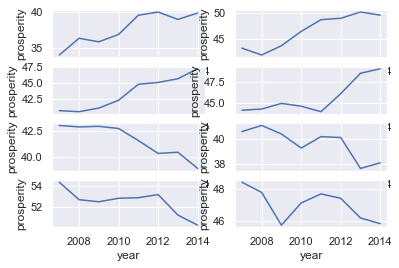

In [205]:
top_5_growth = most_growth_5()
chad = prosperity_data[prosperity_data["country"] == "Chad"]
togo = prosperity_data[prosperity_data["country"] == "Togo"]
zimb = prosperity_data[prosperity_data["country"] == "Zimbabwe"]
ic = prosperity_data[prosperity_data["country"] == "Ivory Coast"]
georgia = prosperity_data[prosperity_data["country"] == "Georgia"]

fig, axs = plt.subplots(ncols=2, nrows=4)
sns.lineplot(x='year', y='prosperity', data=chad, ax=axs[0][0])
sns.lineplot(x='year', y='prosperity', data=togo, ax=axs[1][0])
sns.lineplot(x='year', y='prosperity', data=zimb, ax=axs[0][1])
sns.lineplot(x='year', y='prosperity', data=ic, ax=axs[1][1])

bottom_5_growth = x_growth_5(False)
chad = prosperity_data[prosperity_data["country"] == bottom_5_growth[0]]
togo = prosperity_data[prosperity_data["country"] == bottom_5_growth[1]]
zimb = prosperity_data[prosperity_data["country"] == bottom_5_growth[2]]
ic = prosperity_data[prosperity_data["country"] ==  bottom_5_growth[3]]
georgia = prosperity_data[prosperity_data["country"] == bottom_5_growth[4]]

#fig, axs = plt.subplots(ncols=2, nrows=2)
sns.lineplot(x='year', y='prosperity', data=chad, ax=axs[2][0])
sns.lineplot(x='year', y='prosperity', data=togo, ax=axs[3][0])
sns.lineplot(x='year', y='prosperity', data=zimb, ax=axs[2][1])
sns.lineplot(x='year', y='prosperity', data=ic, ax=axs[3][1])


top_5_growth

#### DATA for BAR CHARTS
def top_bottom_growers(top = True):
    """
    Returns the changes in pillars for top 5 growing countries if top = True
    or for bottom 5 growing (regressing) countries if top = False
    
    """
    
    def pillar_growth_rates(prosperity_data):
        """
        Returns the change in each pillar over time 

        ---

        Example run: pillar_growth_rates(df)
        """
        start = 2007
        end = 2014

        prosperity_data = prosperity_data[['country','year', 'busi', 'econ', 'educ', 'envi', 'gove', 'heal', 'pers', 'safe', 'soci']]
        pillars = ['busi', 'econ', 'educ', 'envi','gove', 'heal', 'pers', 'safe', 'soci']  

        # filter for "end year" and "start year"
        prosperity_data_07= prosperity_data[prosperity_data["year"] == start]
        prosperity_data_14= prosperity_data[prosperity_data["year"] == end]

        for pillar in pillars:    
            # calculate the first part of CAGR, Vfinal/Vbegin 
            prosperity_data_14["temp"] = prosperity_data_14[pillar].values / prosperity_data_07[pillar].values


            def CAGR(row):
                c = 1/((end - start)+1)
                if row > 0:
                    return (row ** c) - 1
                else:
                    temp = abs(row) ** c
                    return -1 * temp - 1

            # calculate the second part of CAGR
            prosperity_data_14["CAGR_{0}".format(pillar)] = prosperity_data_14["temp"].apply(lambda x: CAGR(x))

        return prosperity_data_14#.iloc[:,-9:]

    top_5_growth = most_growth_5()
    bottom_5_growth = most_growth_5(False)
    
    top_5_growers = prosperity_data[prosperity_data["country"].isin(top_5_growth)]
    bottom_5_growers = prosperity_data[prosperity_data["country"].isin(bottom_5_growth)]
    
    if top:   
        return pillar_growth_rates(top_5_growers)
    else:
        return pillar_growth_rates(bottom_5_growers)


bottom_5 = top_bottom_growers(False)
top_5 = top_bottom_growers()

top_5_c = top_5.country.values.tolist()
print(top_5_c)

bottom_5_c = bottom_5.country.values.tolist()
print(bottom_5_c)

CAGR = ['CAGR_busi', 'CAGR_econ', 'CAGR_educ',
       'CAGR_envi', 'CAGR_gove', 'CAGR_heal', 'CAGR_pers', 'CAGR_safe',
       'CAGR_soci']

for pillar in CAGR:
    print(pillar)
    print(bottom_5[pillar].values.tolist())
    print("-----")